Goals:
-----------
    1.Assign leads sscore between 0-100 based on logistic regression model.
    2.Higher score means more chances of conversion.
    3.Make it flexible so that criteria may change on the basis of future needs of the company and so does the result.

In [550]:
#Import Libraries
import pandas as pd
import numpy as np

import os

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [463]:
df=pd.read_csv(r'C:\Users\shlok\OneDrive\Documents\Logistic Regression\Lead Scoring Assignment\Leads.csv')

In [464]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [466]:
df.shape

(9240, 37)

In [467]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


DATA CLEANING AND  PRE-PROCESSING
------
    1.we can see there are many columns has select option which is either by mistake or selection error which we can replace        with null.
    2.we can seesome columns has 2.High 1.Low which must be resolved
    3.There are many columns which has no reltion or will not be used in fnal anaysis we can delete that

In [468]:
#2.Replacing select values in many columns wih NaN
df.replace('Select', np.nan,inplace=True)

In [469]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [470]:
#1.First checking null values
(df.isnull().sum()/len(df))*100 

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [471]:
#Deleting columns with more that 30 percent null values

df.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',
                 'City','Lead Profile','Lead Quality','Tags','How did you hear about X Education','Specialization'],inplace=True,axis=1)

In [472]:
df.shape

(9240, 27)

In [473]:
(df.isnull().sum()/len(df))*100 

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [474]:
#Deleting the rows that has less than 2 percentgae of nul values it will not effect the analysis
df = df[~np.isnan(df['TotalVisits'])]
df = df[~np.isnan(df['Page Views Per Visit'])]

In [475]:
(df.isnull().sum()/len(df))*100 

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.318576
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                          25.530045
What is your current occupation                  29.473800
What matters most to you in choosing a course    29.682522
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Checking columns with large number of null values and replacing it with appropriate sotat we dont loose lots of data
As around 30 percent of data is missing i cannot fill it mode its best to give a neutral value

In [476]:
list(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>=20))].columns)

['Country',
 'What is your current occupation',
 'What matters most to you in choosing a course']

In [477]:
columns=list(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>=20))].columns)
for i in columns:
    df[i]  = df[i].fillna('No Info')


In [478]:
(df.isnull().sum()/len(df))*100 

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.318576
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.000000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.000000
Last Activity                                    0.000000
Country                                          0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [479]:
list(df.loc[df['Lead Source'].isnull(),:].index)

[1569,
 1746,
 2020,
 2025,
 2152,
 2346,
 2544,
 2676,
 3028,
 3266,
 3268,
 3945,
 4406,
 4409,
 4653,
 4804,
 4831,
 4843,
 5253,
 5621,
 5960,
 6124,
 7306,
 7525,
 8092,
 8118,
 8276,
 8490,
 9160]

In [480]:
df = df.drop(labels=list(df.loc[df['Lead Source'].isnull(),:].index),axis=0)

In [481]:
(df.isnull().sum()/len(df))*100 

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [482]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [483]:
#Removing obvious column of no use in analysis
df.drop(columns=['Prospect ID','Lead Number'],inplace=True,axis=1)

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

Univariate Analysis Categorical values
-----

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64

                      Lead Origin      


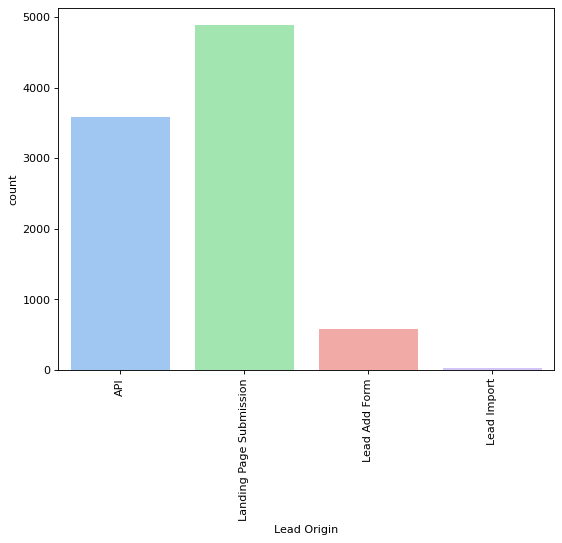

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

                      Lead Source      


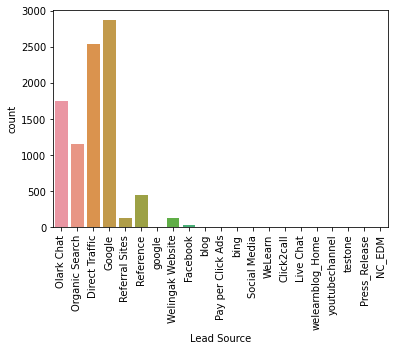

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

                      Do Not Email      


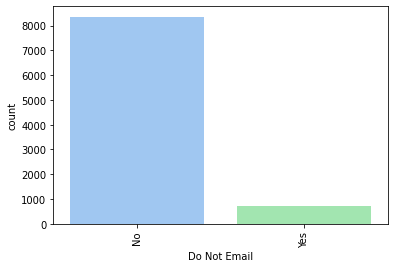

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

                      Do Not Call      


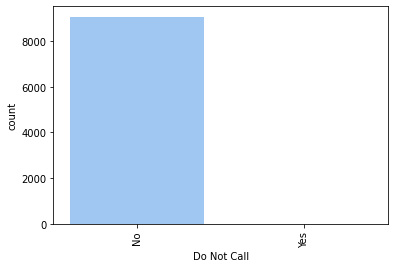

0    0.621446
1    0.378554
Name: Converted, dtype: float64

                      Converted      


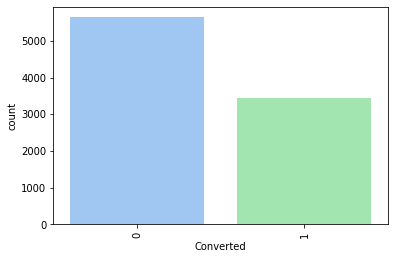

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: Last Activity, dtype: float64

                      Last Activity      


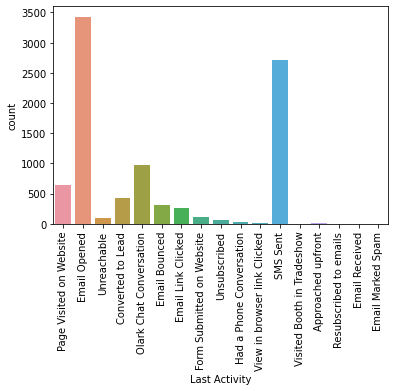

India                   0.715341
No Info                 0.253031
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Bahrain                 0.000771
Hong Kong               0.000771
Oman                    0.000661
France                  0.000661
unknown                 0.000551
Kuwait                  0.000441
South Africa            0.000441
Canada                  0.000441
Nigeria                 0.000441
Germany                 0.000441
Sweden                  0.000331
Philippines             0.000220
Uganda                  0.000220
Italy                   0.000220
Bangladesh              0.000220
Netherlands             0.000220
Asia/Pacific Region     0.000220
China                   0.000220
Belgium                 0.000220
Ghana                   0.000220
Kenya                   0.000110
Sri Lanka 

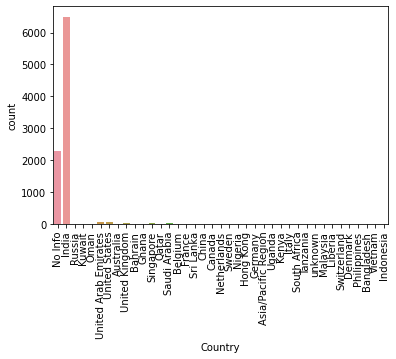

Unemployed              0.603482
No Info                 0.295680
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

                      What is your current occupation      


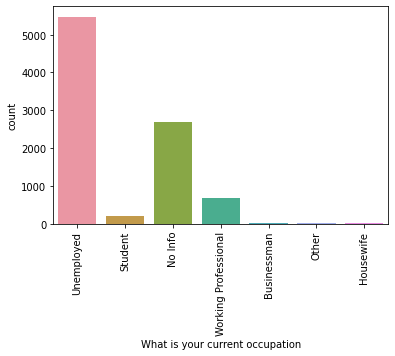

Better Career Prospects      0.702006
No Info                      0.297774
Flexibility & Convenience    0.000110
Other                        0.000110
Name: What matters most to you in choosing a course, dtype: float64

                      What matters most to you in choosing a course      


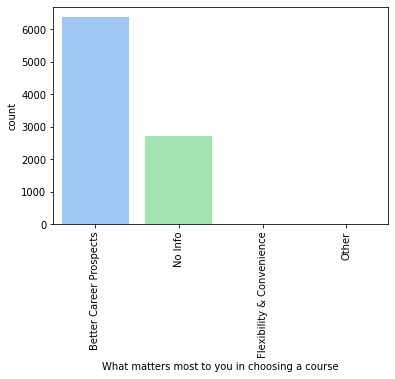

No    1.0
Name: Magazine, dtype: float64

                      Magazine      


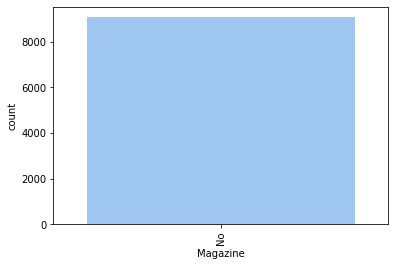

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

                      Newspaper Article      


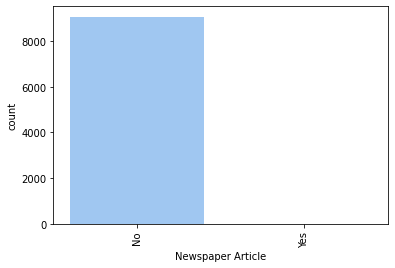

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

                      X Education Forums      


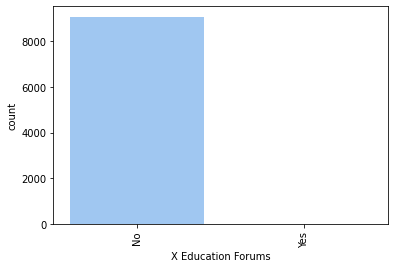

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

                      Newspaper      


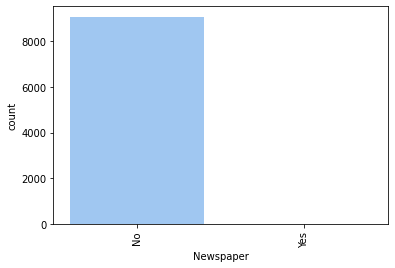

No     0.999559
Yes    0.000441
Name: Digital Advertisement, dtype: float64

                      Digital Advertisement      


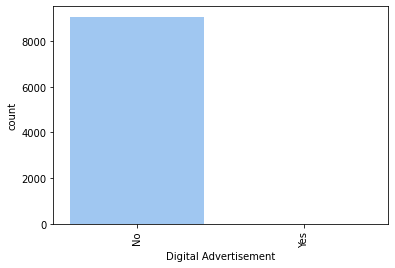

No     0.999229
Yes    0.000771
Name: Through Recommendations, dtype: float64

                      Through Recommendations      


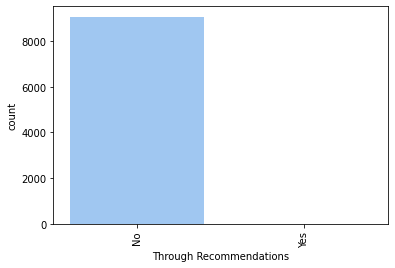

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

                      Receive More Updates About Our Courses      


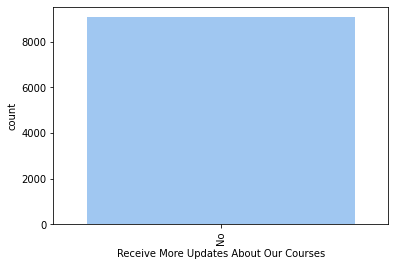

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

                      Update me on Supply Chain Content      


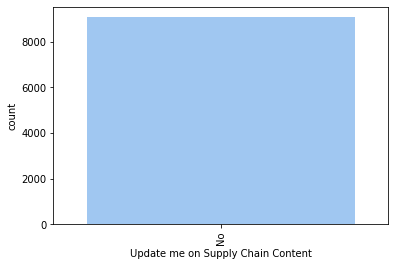

No    1.0
Name: Get updates on DM Content, dtype: float64

                      Get updates on DM Content      


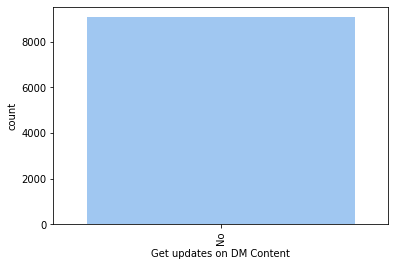

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

                      I agree to pay the amount through cheque      


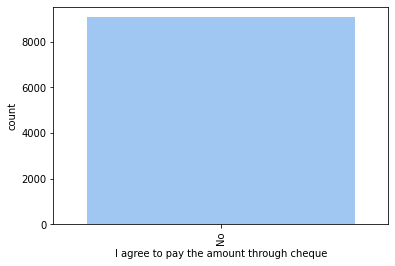

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

                      A free copy of Mastering The Interview      


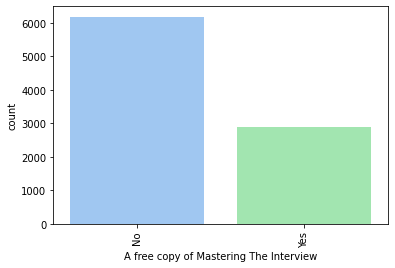

Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Approached upfront              0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Name: Last Notable Activity, dtype: float64

                      Last Notable Activity      


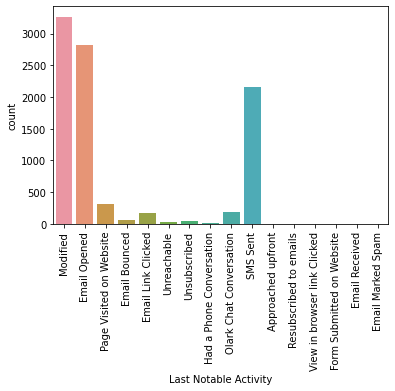

In [485]:

columns=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Converted','Last Activity','Country',
        'What is your current occupation','What matters most to you in choosing a course','Magazine',
         'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations', 
         'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
        'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']
figure(figsize=(8, 6), dpi=80)
plt.style.use('seaborn-pastel')
for i in columns:
    print(df[i].value_counts(normalize=True))
    print('')
    print('                      {}      '.format(i))
    sns.countplot(x=df[i]).tick_params(axis='x', rotation = 90)
    plt.show()

In [486]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No Info,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [487]:
#Deleting all the columns that are imbalanced or amost have one vaue for all the leads as it will have no impact on the anaysis
columns=['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course', 
'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 
'I agree to pay the amount through cheque']
df.drop(columns,axis=1,inplace=True)

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   What is your current occupation         9074 non-null   object 
 8   A free copy of Mastering The Interview  9074 non-null   object 
 9   Last Notable Activity                   9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.8+ KB


In [489]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [490]:
#For ease of creatig dummies lets group low count of categorical varibale together
df['Lead Origin'] =df['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')

df['Lead Source'] =df['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

df['Last Activity']=df['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed',
                                                     'Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                                     'Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')


df['What is your current occupation']=df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

In [491]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


Univariate Analysis Numerical values
-----

Converted
count    9074.000000
mean        0.378554
std         0.485053
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64


C:\Users\shlok\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


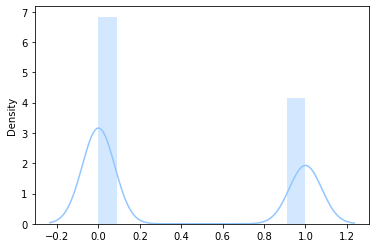

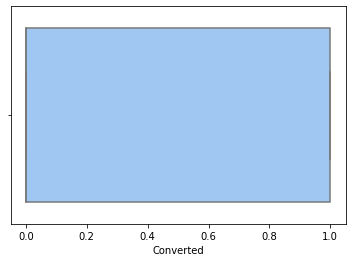

TotalVisits
count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


C:\Users\shlok\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


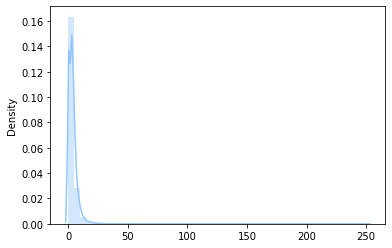

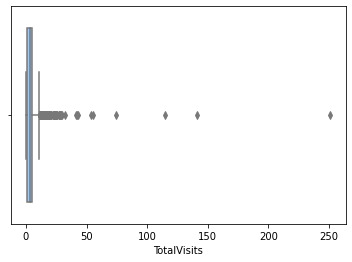

Total Time Spent on Website
count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


C:\Users\shlok\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


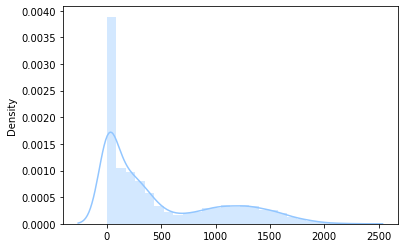

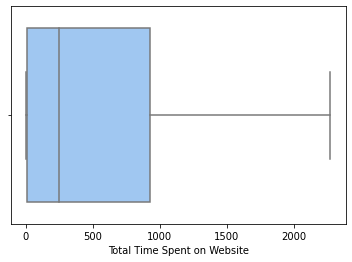

Page Views Per Visit
count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64


C:\Users\shlok\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


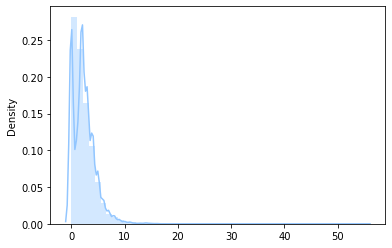

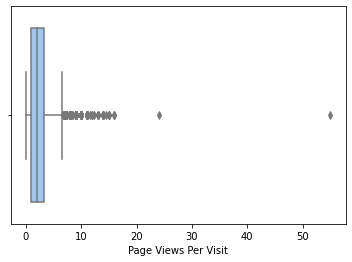

In [492]:
columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.style.use('seaborn-pastel')
for i in columns:
    print(i)
    print(df[i].describe())
    sns.distplot(x=df[i])
    plt.show()

    sns.boxplot(x=df[i])
    plt.show()


In [493]:
df.head(100)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified
...,...,...,...,...,...,...,...,...,...,...
99,Landing Page Submission,Direct Traffic,1,5.0,1563,5.0,Email Opened,Unemployed,Yes,Email Opened
100,API,Others,0,7.0,1633,3.5,Converted to Lead,Unemployed,No,Modified
101,API,Olark Chat,1,0.0,0,0.0,Email Opened,Unemployed,No,Modified
102,Landing Page Submission,Google,0,12.0,809,4.0,Others,No Info,No,Modified


In [494]:
#Lets check the outliers
df[df['TotalVisits']>=20]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
345,Landing Page Submission,Organic Search,1,21.0,1113,2.63,Email Opened,Unemployed,Yes,Email Opened
469,Landing Page Submission,Organic Search,0,22.0,59,5.50,Page Visited on Website,Unemployed,Yes,Page Visited on Website
663,Landing Page Submission,Google,1,21.0,1885,3.50,Email Opened,Unemployed,Yes,Email Opened
1115,API,Direct Traffic,0,20.0,808,2.86,Email Bounced,Unemployed,Yes,Email Bounced
1160,Landing Page Submission,Direct Traffic,0,43.0,57,3.91,Email Opened,Unemployed,No,Email Opened
1459,API,Direct Traffic,0,20.0,1165,2.50,Email Opened,No Info,No,Modified
1741,Landing Page Submission,Direct Traffic,0,22.0,601,1.38,Page Visited on Website,Unemployed,Yes,Page Visited on Website
1824,Landing Page Submission,Direct Traffic,0,30.0,68,10.00,SMS Sent,Unemployed,Yes,Modified
2154,API,Olark Chat,1,23.0,1677,2.09,Olark Chat Conversation,Unemployed,No,Olark Chat Conversation
2190,Landing Page Submission,Direct Traffic,0,55.0,297,55.00,Page Visited on Website,Unemployed,Yes,Modified


In [495]:
#There doesn't seem to be any problem witht he data but few values are very high and might influence the data
df[df['TotalVisits']>=100]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2322,Landing Page Submission,Direct Traffic,0,141.0,755,6.71,Page Visited on Website,No Info,Yes,Page Visited on Website
5608,Landing Page Submission,Others,0,115.0,187,8.21,Page Visited on Website,Unemployed,No,Page Visited on Website
6102,Landing Page Submission,Direct Traffic,1,251.0,49,1.48,Page Visited on Website,Unemployed,Yes,Page Visited on Website


In [496]:
df = df.drop(labels=list(df.loc[df['TotalVisits']>=100,:].index),axis=0)

In [497]:
#Lets check the outliers
df[df['Page Views Per Visit']>=30]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,0,55.0,297,55.0,Page Visited on Website,Unemployed,Yes,Modified


In [498]:
df = df.drop(labels=list(df.loc[df['Page Views Per Visit']>=30,:].index),axis=0)

In [499]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [500]:
df.Converted.astype('category')

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9070, dtype: category
Categories (2, int64): [0, 1]

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9070 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9070 non-null   object 
 1   Lead Source                             9070 non-null   object 
 2   Converted                               9070 non-null   int64  
 3   TotalVisits                             9070 non-null   float64
 4   Total Time Spent on Website             9070 non-null   int64  
 5   Page Views Per Visit                    9070 non-null   float64
 6   Last Activity                           9070 non-null   object 
 7   What is your current occupation         9070 non-null   object 
 8   A free copy of Mastering The Interview  9070 non-null   object 
 9   Last Notable Activity                   9070 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.5+ KB


In [502]:
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x : 1 if x=='YES' else 0)

In [503]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,0,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [504]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Lead Origin


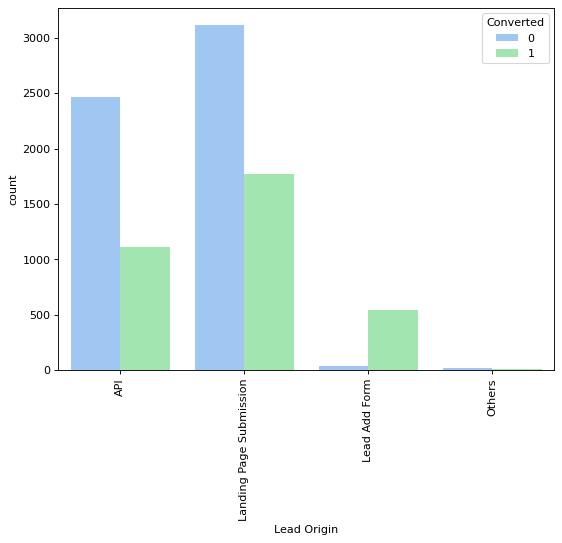

Lead Source


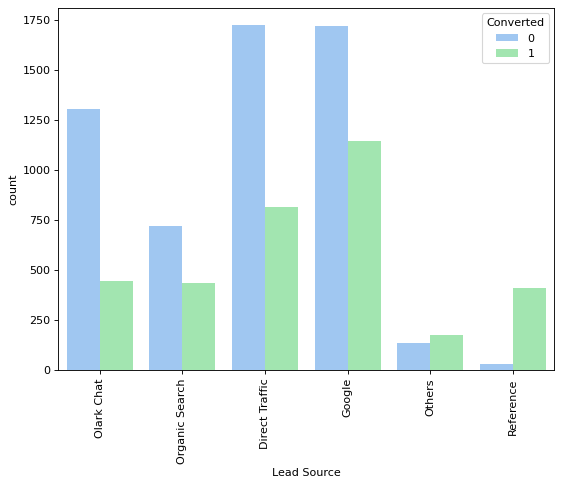

Converted


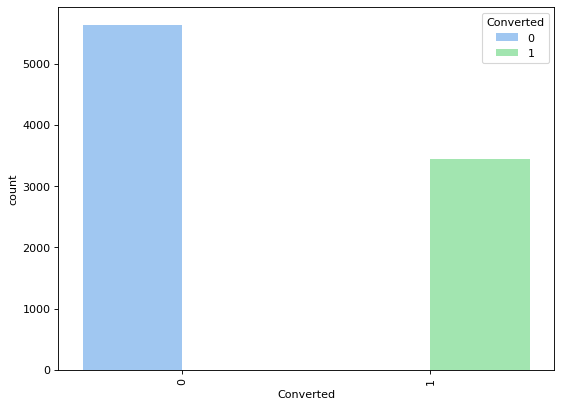

Last Activity


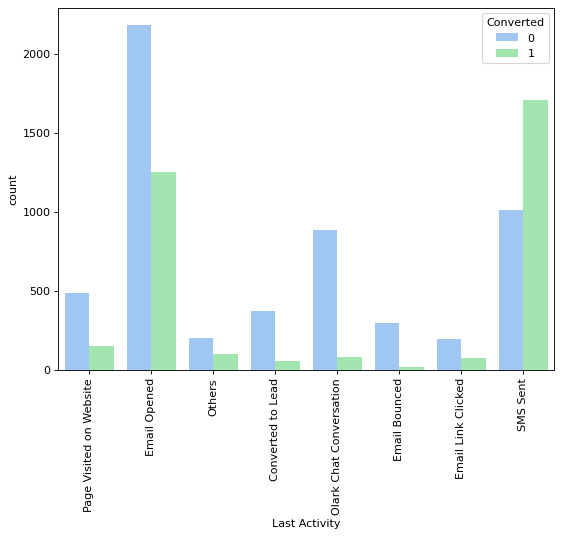

What is your current occupation


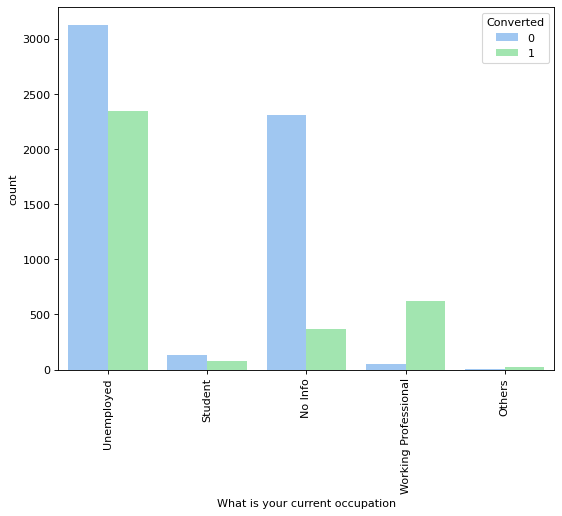

A free copy of Mastering The Interview


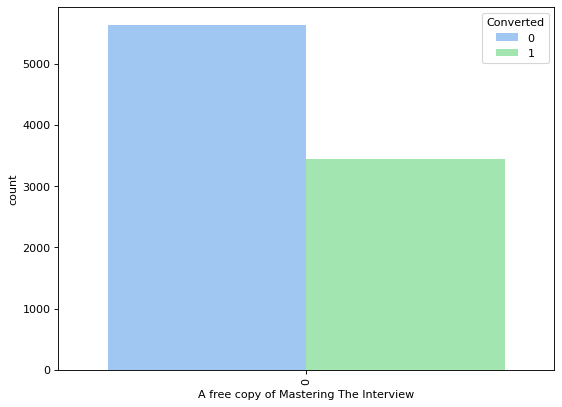

Last Notable Activity


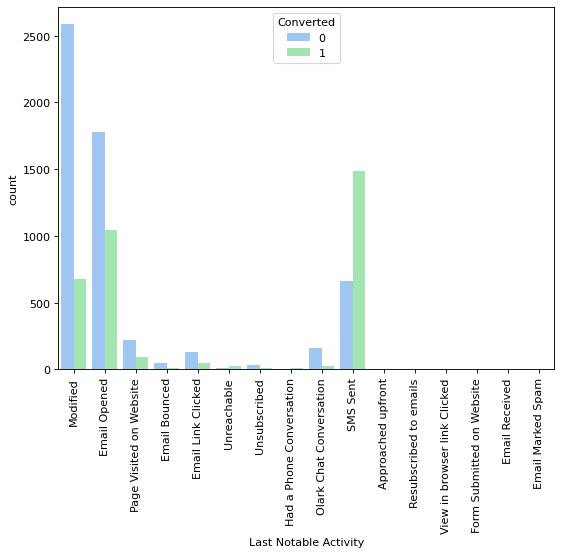

In [505]:
columns=['Lead Origin', 'Lead Source', 'Converted','Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

for i in columns:
    print(i)
    figure(figsize=(8, 6), dpi=80)
    sns.countplot(x=i, hue='Converted', data= df).tick_params(axis='x', rotation = 90)
    plt.show()

In [506]:
#Delete last notale activity as it will no relevance in the analysis it is a activity after the scope of analysis
df.drop(columns=['Last Notable Activity'],inplace=True)

In [507]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [508]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0


In [509]:
#Creating Dummies for Categorical variable 
dummy1 = pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','A free copy of Mastering The Interview','What is your current occupation']], drop_first=True)

In [510]:
df = pd.concat([df, dummy1], axis=1)
df.drop(['Lead Origin','Lead Source','Last Activity','A free copy of Mastering The Interview','What is your current occupation'],axis=1,inplace=True)

In [511]:
df.shape

(9070, 23)

In [512]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


TEST-TRAIN SPLIT

In [513]:
#Definig X
X = df.drop(['Converted'], axis=1)

In [514]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [515]:
#Definig y
y=df['Converted']

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [517]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [518]:
# Mean and Standard deviation
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,6.349000e+03,6.349000e+03,6.349000e+03,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,...,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000
mean,2.126368e-17,5.595706e-18,2.087198e-16,0.537722,0.063002,0.003780,0.323358,0.192629,0.126162,0.034651,...,0.028508,0.377382,0.106946,0.035281,0.073082,0.299417,0.003623,0.022523,0.602300,0.075917
std,1.000079e+00,1.000079e+00,1.000079e+00,0.498614,0.242986,0.061371,0.467795,0.394395,0.332058,0.182909,...,0.166433,0.484770,0.309069,0.184504,0.260292,0.458039,0.060084,0.148389,0.489461,0.264887
min,-9.428393e-01,-8.854411e-01,-1.140014e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.680844e-01,-8.670541e-01,-6.587953e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.185744e-01,-4.386386e-01,-1.775765e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.309356e-01,7.785765e-01,4.624445e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.389393e+01,3.292070e+00,6.559487e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It seems the standard deviation is correct.Note the conversion ratae that we have seen befre is approx 37 percent

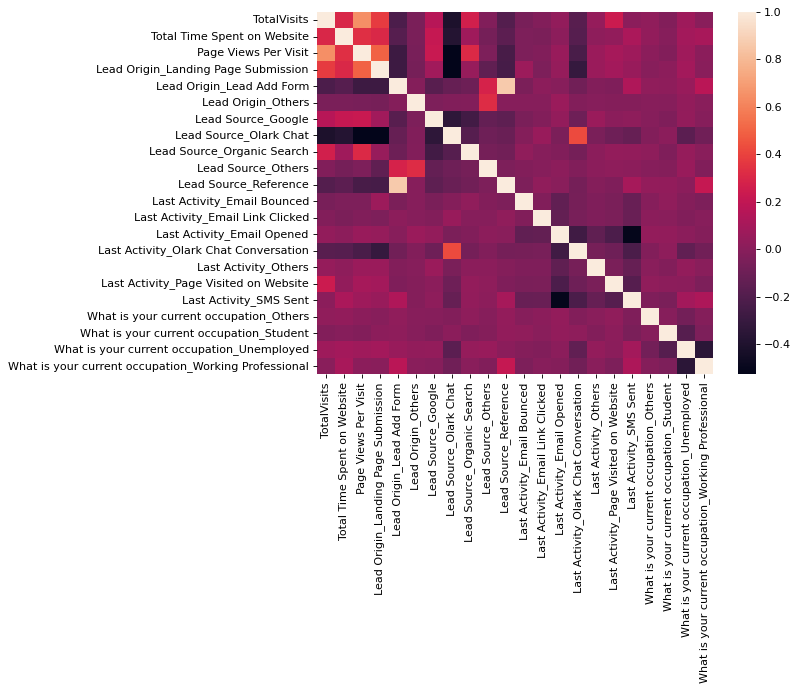

In [520]:
# To check the correlation among varibles
figure(figsize=(8, 6), dpi=80)
sns.heatmap(X_train.corr())
plt.show()

Couldn't figure anything right now

Building Model
------

In [535]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.6
Date:                Tue, 10 Jan 2023   Deviance:                       5193.1
Time:                        22:59:21   Pearson chi2:                 6.29e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4013
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5183      0.245    -14.355      0.000      -3.999      -3.038
TotalVisits                                              0.2148      0.045      4.730      0.000       0.126       0.304
Total Time Spent on Website                              1.0983      0.041     26.984      0.000       1.019       1.178
Page Views Per Visit                                    -0.1457      0.052     -2.796      0.005      -0.248      -0.044
Lead Origin_Landing Page Submission                     -0.1577      0.101     -1.560      0.119      -0.356       0.040
Lead Origin_Lead Add Form                                5.0406      0.687      7.333      0.000       3.693       6.388
Lead Origin_Others                                       1.2683      0.568      2.234      0.026       0.155       2.381
Lead Source_Google                                       0.4427      0.096      4.631      0.000       0.255       0.630
Lead Source_Olark Chat                                   1.5616      0.156     10.012      0.000       1.256       1.867
Lead Source_Organic Search                               0.2665      0.127      2.099      0.036       0.018       0.515
Lead Source_Others                                       0.0211      0.337      0.063      0.950      -0.640       0.682
Lead Source_Reference                                   -1.2356      0.726     -1.703      0.089      -2.658       0.187
Last Activity_Email Bounced                             -0.8297      0.389     -2.131      0.033      -1.593      -0.067
Last Activity_Email Link Clicked                         0.5291      0.306      1.731      0.083      -0.070       1.128
Last Activity_Email Opened                               1.1370      0.216      5.271      0.000       0.714       1.560
Last Activity_Olark Chat Conversation                   -0.4353      0.265     -1.644      0.100      -0.954       0.084
Last Activity_Others                                     0.9822      0.274      3.584      0.000       0.445       1.519
Last Activity_Page Visited on Website                    0.3478      0.256      1.361      0.174      -0.153       0.849
Last Activity_SMS Sent                                   2.2738      0.217     10.472      0.000       1.848       2.699
What is your current occupation_Others                   2.7372      0.580      4.719      0.000       1.600       3.874
What is your current occupation_Student                  1.4049      0.228      6.153      0.000       0.957       1.852
What is your current occupation_Unemployed               1.2477      0.087     14.270      0.000       1.076       1.419
What is your current occupation_Working Professional     3

 observation:coeficient are both positive and negative

In [536]:
logreg = LogisticRegression()

In [542]:
#USING RFE fr feature selection
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [543]:
# Feature variables with their RFE status and rank 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Others', False, 6),
 ('Lead Source_Reference', False, 12),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Others', False, 2),
 ('Last Activity_Page Visited on Website', False, 4),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Others', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [546]:
#All the colums selected by RFE in col
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'What is your current occupation_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [547]:
#colums rejected by rfe
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website'],
      dtype='object')

Second Model

In [548]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.6
Date:                Tue, 10 Jan 2023   Deviance:                       5295.2
Time:                        23:24:11   Pearson chi2:                 6.35e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
well pvalue is less than 5

Checking VIF

In [551]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.16
6,Last Activity_SMS Sent,1.70
5,Last Activity_Email Opened,1.67
3,Lead Source_Olark Chat,1.34
0,Total Time Spent on Website,1.31
10,What is your current occupation_Working Profes...,1.27
1,Lead Origin_Lead Add Form,1.25
4,Last Activity_Email Bounced,1.05
8,What is your current occupation_Student,1.04
2,Lead Origin_Others,1.02


we can check VIF there is no multicollinearity as vif is less than 3

TO DO 
-----------
    - Check the model and video again to check why th column selction is showing 3 arguments 
    - ceck t
    -Complete the rest on or before 10th
    -Ater submiting work  request in devops for 316 and 512
    -Inform Manager about resolved bugs.
    -Submit CVs to company vacancy
    -complete the new module in upgrad 